In [1]:
# data extractor program
#
# inputs:
# 	data_folder: where all your data files are stored
#	starting_string: which string signals that the data starts
#   unique_id: what is different amongst all the files
#
# outputs:
#   concatenated dataframe of all 

import pandas as pd
import os
import re
import seaborn as sns
import math
import matplotlib.pyplot as plt

%matplotlib inline


starting_string = 'time/s'
unique_id = 'Ei (V)'

def read_file(path, file, last_n_lines):
    with open(path+file, 'r') as f:
        unique_id_file = 0
        columns = []
        while True:
            line = f.readline()
            # We assume that unique_id is only found once in the file
            if unique_id in line:
                unique_id_file = re.findall(r'(\d.\d\d\d)', line)[0]
                print(f'unique id in file: {unique_id_file}')
            if starting_string in line:
                columns = line.split('\t')[:-1]
                print(f'cols in file: {columns}')
                df = pd.read_csv(f, delimiter='\t', names=columns)
                df[f'{unique_id}'] = unique_id_file
                break
    return df.iloc[-last_n_lines:]

def get_concentration_and_electrolyte_from_filename(filename):
    answer = re.findall(r'(\S*M)\s(\S*)', filename)
    concentration = answer[0][0]
    electrolyte = answer[0][1]
    return concentration, electrolyte

def read_all_files_in_folder(path, last_n_lines):
    file_list = os.listdir(path)
    df = pd.DataFrame([])
    for filename in file_list:
        new_df = read_file(path, filename, last_n_lines)
        concentration, electrolyte = get_concentration_and_electrolyte_from_filename(filename)
        new_df['concentration'] = concentration
        new_df['electrolyte']   = electrolyte
        df = df.append(new_df)
    return df

def read_all_folders(main_folder, last_n_lines=100):
    subfolders = os.listdir(main_folder)
    df = pd.DataFrame()
    for subfolder in subfolders:
        df = df.append(read_all_files_in_folder(path, last_n_lines))  
    return df

In [ ]:
main_folder = "TODO"
df = read_all_folders(main_folder)

In [2]:
# path = '../Data/Microelectrodes/data_folder_Ir_HClO4/'
# last_n_lines = 100

# df = read_all_files(path, last_n_lines)

unique id in file: 1.400
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 1.450
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 1.500
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 1.550
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 1.600
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 1.650
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 1.700
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 1.750
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 1.800
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 1.850
cols in file: ['time/s', 'Ewe/V', 'I/mA']
unique id in file: 1.900
cols in file: ['time/s', 'Ewe/V', 'I/mA']


In [3]:
# define area
diameter = 75
area = math.pi * (diameter)**2 / (4 * (10000)**2)

# get plot data
plot_data = df.groupby([unique_id, 'concentration', 'electrolyte'], as_index=False).mean()
plot_data['I/mA'] = plot_data['I/mA']/area
plot_data['Electrolyte'] = plot_data['concentration'].str.cat(plot_data['electrolyte'], sep=' ')
plot_data['concentration_value'] = plot_data['concentration'].str.slice(stop=-1).astype('float')
plot_data = plot_data.sort_values(['electrolyte', 'concentration_value'])
plot_data

,Ei (V),concentration,electrolyte,time/s,Ewe/V,I/mA,Electrolyte,concentration_value
0,1.400,0.1M,HClO4,295.071293,1.399444,1.373534,0.1M HClO4,0.1
1,1.450,0.1M,HClO4,595.002583,1.449562,1.313518,0.1M HClO4,0.1
2,1.500,0.1M,HClO4,895.002975,1.499494,5.027257,0.1M HClO4,0.1
3,1.550,0.1M,HClO4,1495.003362,1.549474,16.539877,0.1M HClO4,0.1
4,1.600,0.1M,HClO4,2095.003947,1.599473,47.170637,0.1M HClO4,0.1
5,1.650,0.1M,HClO4,2695.018194,1.649415,87.874360,0.1M HClO4,0.1
6,1.700,0.1M,HClO4,3595.024117,1.699425,105.491787,0.1M HClO4,0.1
7,1.750,0.1M,HClO4,4495.005692,1.749526,133.086150,0.1M HClO4,0.1
8,1.800,0.1M,HClO4,5395.013805,1.799492,227.290430,0.1M HClO4,0.1
9,1.850,0.1M,HClO4,6595.047146,1.849597,411.549903,0.1M HClO4,0.1


Text(0.5, 0, '$E \\ vs. \\ RHE [V]$')

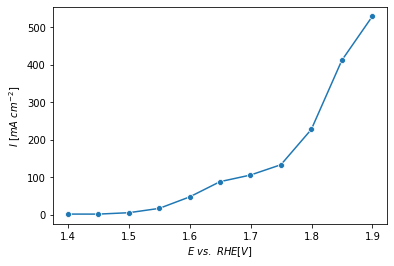

In [4]:
# # two plots

# fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x='Ewe/V', y='I/mA', data=plot_data[plot_data['electrolyte']=='KHCO3'], 
#                     hue='Electrolyte', marker='o', palette='Blues', ax=axs[0])
# sns.lineplot(x='Ewe/V', y='I/mA', data=plot_data[plot_data['electrolyte']=='KOH'], 
#                     hue='Electrolyte', marker='o', palette='Reds', ax=axs[1])

fig, ax = plt.subplots()

#sns.lineplot(x='Ewe/V', y='I/mA', data=plot_data[plot_data['electrolyte']=='KHCO3'], 
#                    hue='Electrolyte', marker='o', palette='Blues')
#sns.lineplot(x='Ewe/V', y='I/mA', data=plot_data[plot_data['electrolyte']=='KOH'], 
#                    hue='Electrolyte', marker='o', palette='Reds')
sns.lineplot(x='Ewe/V', y='I/mA', data=plot_data[plot_data['electrolyte']=='HClO4'],
                     marker='o')

ax.set_ylabel(r'$I \ [mA \ cm^{-2}]$')
ax.set_xlabel(r'$E \ vs. \ RHE [V]$')
#ax.set_title(r'$75 \ \mu m \ Ir$')
#fig.savefig('Ir_OER_HClO4.png', dpi=500, bbox_to_inches='tight')